In [ ]:
# Дополнительный проект

#     В данном проекте вы поработаете с довольно нетипичными для аналитика данными: gff файлом, который описывает 
#     геном мухи. 

#     Задачи

#     Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x
#     Выясните, какое из этих значений является самым частым
#     Постройте распределение встречаемости значений в столбце type

In [ ]:
#     Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x
#     Выясните, какое из этих значений является самым частым

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pd.read_csv('gff.tsv', sep='\t') # короткий путь

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1
...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1


In [24]:
my_list = open('gff.tsv').readlines() # длинный путь

In [25]:
my_list

['seq_id\tsource\ttype\tstart\tend\tscore\tstrand\tphase\tattributes\n',
 'chr17\tRefSeq\texon\t6811330\t6811453\t.\t+\t.\tParent=XM_001475631.1\n',
 'chr17\tRefSeq\tCDS\t6808204\t6808245\t.\t+\t0\tName=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,\n',
 'chr17\tRefSeq\tCDS\t6811792\t6811869\t.\t+\t2\tName=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,\n',
 'chr17\tRefSeq\texon\t6806513\t6806553\t.\t+\t.\tParent=XM_001475631.1\n',
 'chr17\tRefSeq\tfive_prime_UTR\t6806513\t6806526\t.\t+\t.\tParent=XM_001475631.1\n',
 'chr17\tRefSeq\tfive_prime_UTR\t6797760\t6797769\t.\t+\t.\tParent=XM_001475631.1\n',
 'chr17\tRefSeq\tCDS\t6811330\t6811453\t.\t+\t0\tName=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,\n',
 'chr17\tRefSeq\texon\t6808204\t6808245\t.\t+\t.\tParent=XM_001475631.1\n',
 'chr17\tRefSeq\tmRNA\t6797760\t6818159\t.\t+\t.\tID=XM_001475631.1;Parent=NC_000083.5:LOC100040603\n',
 'chr17\tRefSeq\tCDS\t6808204\t6808245\t.\t+\t0\tName=CDS:NC_000083.5:LOC100040603;Parent=XM_

In [157]:
all_data = []

In [158]:
[col.strip() for col in col_name.split('\t')]

['seq_id',
 'source',
 'type',
 'start',
 'end',
 'score',
 'strand',
 'phase',
 'attributes']

In [207]:
for i in my_list:
    if 'seq_id' in i:
        col_name = i   
        continue      
    all_data.append([value.strip() for value in i.split('\t')])

In [160]:
final_col_names = [col.strip() for col in col_name.split('\t')]

In [161]:
df_my_list = pd.DataFrame(all_data, columns=final_col_names)
df_my_list

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1
...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1


In [162]:
df_my_list.attributes.str.split(';')

0                                [Parent=XM_001475631.1]
1      [Name=CDS:NC_000083.5:LOC100040603, Parent=XM_...
2      [Name=CDS:NC_000083.5:LOC100040603, Parent=XM_...
3                                [Parent=XM_001475631.1]
4                                [Parent=XM_001475631.1]
                             ...                        
507                              [Parent=XM_001475631.1]
508                         [ID=, Parent=XM_001475631.1]
509    [Name=CDS:NC_000083.5:LOC100040603, Parent=XM_...
510                              [Parent=XM_001475631.1]
511                              [Parent=XM_001475631.1]
Name: attributes, Length: 512, dtype: object

In [163]:
df_my_list['attributes_split'] = df_my_list.attributes.apply(lambda x: x.split(';')[-1])
df_my_list

,seq_id,source,type,start,end,score,strand,phase,attributes,attributes_split
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"Parent=XM_001475631.1,"
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"Parent=XM_001475631.1,"
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1
...,...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1,Parent=XM_001475631.1
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"Parent=XM_001475631.1,"
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1


In [164]:
df_my_list['attributes_split_split'] = df_my_list.attributes_split.apply(lambda x: x.split('=')[-1].strip(','))
df_my_list

,seq_id,source,type,start,end,score,strand,phase,attributes,attributes_split,attributes_split_split
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1,XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"Parent=XM_001475631.1,",XM_001475631.1
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"Parent=XM_001475631.1,",XM_001475631.1
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1,XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1,XM_001475631.1
...,...,...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1,XM_001475631.1
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1,Parent=XM_001475631.1,XM_001475631.1
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"Parent=XM_001475631.1,",XM_001475631.1
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1,Parent=XM_001475631.1,XM_001475631.1


In [165]:
df_my_list \
    .groupby('attributes_split_split') \
    .agg({'source': 'count'})

,source
attributes_split_split,
NC_000083.5:LOC100040603,33
XM_001475631.1,479


In [170]:
df_my_list.attributes_split_split.value_counts()

XM_001475631.1              479
NC_000083.5:LOC100040603     33
Name: attributes_split_split, dtype: int64

In [ ]:
#     Постройте распределение встречаемости значений в столбце type

In [169]:
df_my_list.type.value_counts()

exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

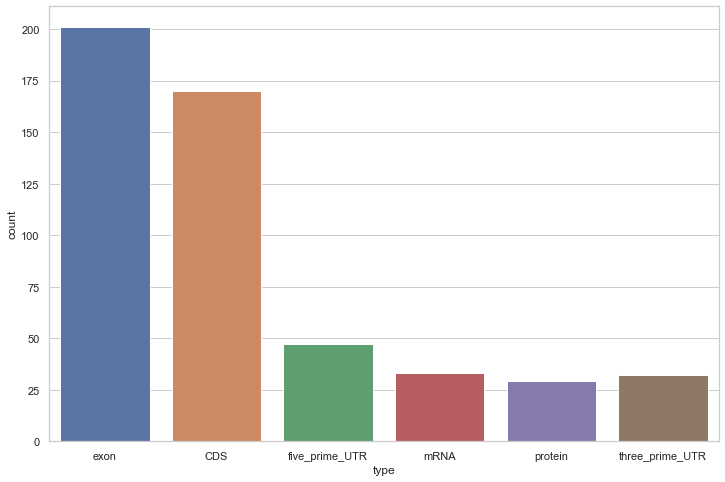

In [206]:
plt.figure(figsize=(12, 8))
sns.countplot(x='type', data=df_my_list)